Option A
 * Transform the json profiles into feature vectors

In [82]:
import json
import pandas as pd
data = []
with open('customersdata.json') as f:
    for line in f:
        data.append(json.loads(line))

print(type(data))

<class 'list'>


In [3]:
# Creating a dataframe object from listoftuples
df1 = pd.DataFrame(data) 

In [4]:
df1.groupby('fraudulent').size()

fraudulent
False    107
True      61
dtype: int64

In [5]:
df1

,customer,fraudulent,orders,paymentMethods,transactions
0,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,"{'customerEmail': 'andersonwilliam@yahoo.com',...",False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...",False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,"{'customerEmail': 'uchen@malone.com', 'custome...",True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."
5,"{'customerEmail': 'robinsoncynthia@dunn.com', ...",True,"[{'orderId': 'vq7j5b', 'orderAmount': 25, 'ord...","[{'paymentMethodId': 'wferzj9en', 'paymentMeth...","[{'transactionId': '67qcpl0r', 'orderId': 'vq7..."
6,{'customerEmail': 'samuel15@saunders-rhodes.co...,True,"[{'orderId': 'sq7rk9', 'orderAmount': 40, 'ord...","[{'paymentMethodId': 'je76d0ulj', 'paymentMeth...","[{'transactionId': '9jutaun8', 'orderId': 'sq7..."
7,"{'customerEmail': 'johnlowery@gmail.com', 'cus...",True,"[{'orderId': 'kanub7', 'orderAmount': 65, 'ord...","[{'paymentMethodId': '8xex97krx', 'paymentMeth...","[{'transactionId': 'cfoevtai', 'orderId': 'kan..."
8,"{'customerEmail': 'jameslandry@rodriguez.com',...",False,"[{'orderId': 'mtg9kj', 'orderAmount': 25, 'ord...","[{'paymentMethodId': 'yk3gx9knx', 'paymentMeth...","[{'transactionId': 'idd9amrw', 'orderId': 'mtg..."
9,{'customerEmail': 'ubranch@rivera-parker.info'...,True,[],"[{'paymentMethodId': '37264k8rb', 'paymentMeth...",[]


In [6]:
finalres = pd.DataFrame()
for i in range(0,len(df1)):
    final=pd.DataFrame.from_dict([df1['customer'][i]])
    finalres=finalres.append(final)

In [7]:
dff=pd.DataFrame()
dff['customerBillingAddress']=finalres['customerBillingAddress']
dff['customerDevice']=finalres['customerDevice']
dff['customerEmail']=finalres['customerEmail']
dff['customerIPAddress']=finalres['customerIPAddress']
dff['customerPhone']=finalres['customerPhone']

In [8]:
list_fra=list(df1['fraudulent'])

In [9]:
dff['fraudulent']=list_fra

In [11]:
dff

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,False
0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,True
0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,False
0,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,False
0,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,True
0,"65233 Hutchinson Mountains\nMartinezside, OR 7...",hbww39m1wenbq4ymjhsx,robinsoncynthia@dunn.com,43.166.163.164,+65(5)8997489788,True
0,"3960 Emily Fort\nStaceytown, AR 21817-3325",up7afvce5v0omniqlevq,samuel15@saunders-rhodes.com,33.67.35.30,05045239487,True
0,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",rjb0adai34izqvys4938,johnlowery@gmail.com,212.144.68.190,044-642-9860,True
0,USNS Price\nFPO AE 14661,yz4l2bgbvzra5eb5qcan,jameslandry@rodriguez.com,c899:ff67:6864:4365:def3:3023:655f:5181,1-885-168-1310x338,False
0,"6974 Robertson Common Apt. 902\nPort Juanside,...",6mpx027neyz6sh04n3ue,ubranch@rivera-parker.info,86.16.65.228,(772)964-8162x6310,True


In [10]:
finalres1 = pd.DataFrame()
for i in range(0,len(df1)):
    final1=pd.DataFrame.from_dict([df1['orders'][i]])
    finalres1=finalres1.append(final1)

In [11]:
df1['transactions'][0]

[{'transactionId': 'a9lcj51r',
  'orderId': 'vjbdvd',
  'paymentMethodId': 'wt07xm68b',
  'transactionAmount': 18,
  'transactionFailed': False},
 {'transactionId': 'y4wcv03i',
  'orderId': 'yp6x27',
  'paymentMethodId': 'wt07xm68b',
  'transactionAmount': 26,
  'transactionFailed': False}]

In [12]:
df1['orders'][0]

[{'orderId': 'vjbdvd',
  'orderAmount': 18,
  'orderState': 'pending',
  'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'},
 {'orderId': 'yp6x27',
  'orderAmount': 26,
  'orderState': 'fulfilled',
  'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'}]

In [13]:
df1['customer'][0]

{'customerEmail': 'josephhoward@yahoo.com',
 'customerPhone': '400-108-5415',
 'customerDevice': 'yyeiaxpltf82440jnb3v',
 'customerIPAddress': '8.129.104.40',
 'customerBillingAddress': '5493 Jones Islands\nBrownside, CA 51896'}

In [14]:
 df100 = pd.DataFrame(df1['orders'][0]) 

In [15]:
df100

,orderAmount,orderId,orderShippingAddress,orderState
0,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending
1,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled


In [16]:
finalres2=pd.DataFrame()
for i in range(0,len(df1)):
    final2=pd.DataFrame(df1['orders'][i])
    finalres2=finalres2.append(final2)

In [17]:
finalres3=pd.DataFrame()
for i in range(0,len(df1)):
    final3=pd.DataFrame(df1['transactions'][i])
    finalres3=finalres3.append(final3)

In [18]:
finalres3=finalres3.reset_index()

In [19]:
del finalres3['index']

In [20]:
finalres2=finalres2.reset_index()

In [21]:
del finalres2['index']

In [22]:
k=-1
res=pd.DataFrame()
for i in range(0,len(finalres3)):
    for j in range(0,len(finalres2)):
        if finalres3.loc[i]['orderId']==finalres2.loc[j]['orderId']:
            lst=[]
            k=k+1
            lst.append(finalres3.loc[i]['orderId'])
            lst.append(finalres2.loc[j]['orderAmount'])
            lst.append(finalres2.loc[j]['orderState'])
            lst.append(finalres2.loc[j]['orderShippingAddress'])
            lst.append(finalres3.loc[i]['transactionId'])
            lst.append(finalres3.loc[i]['paymentMethodId'])
            lst.append(finalres3.loc[i]['transactionAmount'])
            lst.append(finalres3.loc[i]['transactionFailed'])
            res[k]=lst            

In [23]:
res

,0,1,2,3,4,5,6,7,8,9,...,613,614,615,616,617,618,619,620,621,622
0,vjbdvd,yp6x27,nlghpa,uw0eeb,bn44oh,yk34y2,28v6b0,28v6b0,itnk8y,itnk8y,...,wjq6ep,zynstd,diw3zx,ow1cih,ak5a9n,1bubxa,1bubxa,1bubxa,p0gdbf,5lmvrj
1,18,26,45,23,43,33,24,24,25,25,...,43,64,40,23,32,25,25,25,19,27
2,pending,fulfilled,fulfilled,fulfilled,fulfilled,failed,fulfilled,fulfilled,fulfilled,fulfilled,...,fulfilled,fulfilled,fulfilled,fulfilled,fulfilled,fulfilled,fulfilled,fulfilled,fulfilled,fulfilled
3,"5493 Jones Islands\nBrownside, CA 51896","5493 Jones Islands\nBrownside, CA 51896","898 Henry Ports\nNew Keithview, CA 95893-2497",356 Elizabeth Inlet Suite 120\nPort Joshuabury...,"5093 Bryan Forks\nJoshuaton, FM 01565-9801","8478 Sean Ridges Apt. 441\nDavisberg, PR 72250","8478 Sean Ridges Apt. 441\nDavisberg, PR 72250","8478 Sean Ridges Apt. 441\nDavisberg, PR 72250","22396 Victor Lights\nCarsonstad, MO 93914","22396 Victor Lights\nCarsonstad, MO 93914",...,"16953 Jennifer Springs\nKathybury, IL 02095-3215","46911 Blankenship Lakes\nHernandezside, IN 469...","16953 Jennifer Springs\nKathybury, IL 02095-3215","130 Kimberly Junctions\nEricmouth, KS 59756-2919","750 Sarah Stream\nAndersonfurt, WI 68970","130 Kimberly Junctions\nEricmouth, KS 59756-2919","130 Kimberly Junctions\nEricmouth, KS 59756-2919","130 Kimberly Junctions\nEricmouth, KS 59756-2919","130 Kimberly Junctions\nEricmouth, KS 59756-2919","539 Branch Shore\nLake Roy, IA 11884"
4,a9lcj51r,y4wcv03i,5mi94sfw,br8ba1nu,a33145ss,q3lyvbza,3alf9irw,69w9wymx,pegqc4ud,uo3slwh7,...,l2t3xn9z,yb9ejssg,j3xzwavj,6incxb5x,wpd29k0c,7yilsi1o,wmh52bns,c82k5bcv,xdw33hfp,wgmajf82
5,wt07xm68b,wt07xm68b,41ug157xz,41ug157xz,y3xp697jx,8pneoi03z,8pneoi03z,8pneoi03z,dluy3jka0,8pneoi03z,...,pj3k9zcc7,oycs53i0s,oycs53i0s,3zmkegkb8,7yen1m1q8,7yen1m1q8,3zmkegkb8,7yen1m1q8,3zmkegkb8,f0xnu5om9
6,18,26,45,23,43,33,24,24,25,25,...,43,64,40,23,32,25,25,25,19,27
7,False,False,False,False,True,False,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False


In [24]:
res=res.transpose()

In [25]:
res.rename(columns={0:'orderId',1:'orderAmount',2:'orderState',3:'orderShippingAddress',4:'transactionId',5:'paymentMethodId',6:'transactionAmount',7:'transactionFailed'}, 
                 inplace=True)

In [26]:
dff

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,False
0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,True
0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,False
0,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,False
0,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,True
0,"65233 Hutchinson Mountains\nMartinezside, OR 7...",hbww39m1wenbq4ymjhsx,robinsoncynthia@dunn.com,43.166.163.164,+65(5)8997489788,True
0,"3960 Emily Fort\nStaceytown, AR 21817-3325",up7afvce5v0omniqlevq,samuel15@saunders-rhodes.com,33.67.35.30,05045239487,True
0,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",rjb0adai34izqvys4938,johnlowery@gmail.com,212.144.68.190,044-642-9860,True
0,USNS Price\nFPO AE 14661,yz4l2bgbvzra5eb5qcan,jameslandry@rodriguez.com,c899:ff67:6864:4365:def3:3023:655f:5181,1-885-168-1310x338,False
0,"6974 Robertson Common Apt. 902\nPort Juanside,...",6mpx027neyz6sh04n3ue,ubranch@rivera-parker.info,86.16.65.228,(772)964-8162x6310,True


In [27]:
dff=dff.reset_index()

In [28]:
del dff['index']

In [40]:
finalres4=pd.DataFrame()
for i in range(0,len(df1)):
    final4=pd.DataFrame(df1['paymentMethods'][i])
    finalres4=finalres4.append(final4)

In [44]:
k=-1
res1=pd.DataFrame()
for i in range(0,len(res)):
    for j in range(0,len(finalres4)):
        if finalres4.loc[j]['paymentMethodId']==res.loc[i]['paymentMethodId']:
            lst=[]
            k=k+1
            lst.append(res.loc[i]['paymentMethodId'])
            lst.append(finalres4.loc[j]['paymentMethodId'])
            lst.append(finalres4.loc[j]['paymentMethodRegistrationFailure'])
            lst.append(finalres4.loc[j]['paymentMethodType'])
            lst.append(finalres4.loc[j]['paymentMethodProvider'])
            lst.append(finalres4.loc[j]['paymentMethodIssuer'])
            lst.append(res.loc[i]['orderId'])
            lst.append(res.loc[i]['transactionAmount'])
            lst.append(res.loc[i]['transactionFailed']) 
            res1[k]=lst

In [41]:
finalres4=finalres4.reset_index()

In [42]:
len(data[10]['orders'])

5

In [43]:
del finalres4['index']

In [45]:
res1=res1.transpose()

In [46]:
res1.rename(columns={0:'paymentMethodId',1:'paymentMethodId',2:'paymentMethodRegistrationFailure',3:'paymentMethodType',4:'paymentMethodProvider',5:'paymentMethodIssuer',6:'orderId',7:'transactionAmount',8:'transactionFailed'}, 
                 inplace=True)

In [47]:
result_final = pd.concat([res,res1], axis=1, sort=False)

In [48]:
result_final

,orderId,orderAmount,orderState,orderShippingAddress,transactionId,paymentMethodId,transactionAmount,transactionFailed,paymentMethodId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,orderId,transactionAmount,transactionFailed
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,wt07xm68b,18,False,wt07xm68b,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,vjbdvd,18,False
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,wt07xm68b,26,False,wt07xm68b,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,yp6x27,26,False
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",5mi94sfw,41ug157xz,45,False,41ug157xz,41ug157xz,False,bitcoin,American Express,Bastion Banks,nlghpa,45,False
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,41ug157xz,23,False,41ug157xz,41ug157xz,False,bitcoin,American Express,Bastion Banks,uw0eeb,23,False
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",a33145ss,y3xp697jx,43,True,y3xp697jx,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,bn44oh,43,True
5,yk34y2,33,failed,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",q3lyvbza,8pneoi03z,33,False,8pneoi03z,8pneoi03z,False,card,JCB 16 digit,Bastion Banks,yk34y2,33,False
6,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",3alf9irw,8pneoi03z,24,True,8pneoi03z,8pneoi03z,False,card,JCB 16 digit,Bastion Banks,28v6b0,24,True
7,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",69w9wymx,8pneoi03z,24,False,8pneoi03z,8pneoi03z,False,card,JCB 16 digit,Bastion Banks,28v6b0,24,False
8,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914",pegqc4ud,dluy3jka0,25,True,dluy3jka0,dluy3jka0,False,card,Discover,His Majesty Bank Corp.,itnk8y,25,True
9,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914",uo3slwh7,8pneoi03z,25,False,8pneoi03z,8pneoi03z,False,card,JCB 16 digit,Bastion Banks,itnk8y,25,False


In [49]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [50]:
duplicateColumnNames = getDuplicateColumns(result_final)
 
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  orderId
Column name :  transactionAmount
Column name :  paymentMethodId
Column name :  transactionFailed


In [51]:
result_final

,orderId,orderAmount,orderState,orderShippingAddress,transactionId,paymentMethodId,transactionAmount,transactionFailed,paymentMethodId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,orderId,transactionAmount,transactionFailed
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,wt07xm68b,18,False,wt07xm68b,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,vjbdvd,18,False
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,wt07xm68b,26,False,wt07xm68b,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,yp6x27,26,False
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",5mi94sfw,41ug157xz,45,False,41ug157xz,41ug157xz,False,bitcoin,American Express,Bastion Banks,nlghpa,45,False
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,41ug157xz,23,False,41ug157xz,41ug157xz,False,bitcoin,American Express,Bastion Banks,uw0eeb,23,False
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",a33145ss,y3xp697jx,43,True,y3xp697jx,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,bn44oh,43,True
5,yk34y2,33,failed,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",q3lyvbza,8pneoi03z,33,False,8pneoi03z,8pneoi03z,False,card,JCB 16 digit,Bastion Banks,yk34y2,33,False
6,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",3alf9irw,8pneoi03z,24,True,8pneoi03z,8pneoi03z,False,card,JCB 16 digit,Bastion Banks,28v6b0,24,True
7,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",69w9wymx,8pneoi03z,24,False,8pneoi03z,8pneoi03z,False,card,JCB 16 digit,Bastion Banks,28v6b0,24,False
8,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914",pegqc4ud,dluy3jka0,25,True,dluy3jka0,dluy3jka0,False,card,Discover,His Majesty Bank Corp.,itnk8y,25,True
9,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914",uo3slwh7,8pneoi03z,25,False,8pneoi03z,8pneoi03z,False,card,JCB 16 digit,Bastion Banks,itnk8y,25,False


In [52]:
dff

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,False
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,True
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,False
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,False
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,True
5,"65233 Hutchinson Mountains\nMartinezside, OR 7...",hbww39m1wenbq4ymjhsx,robinsoncynthia@dunn.com,43.166.163.164,+65(5)8997489788,True
6,"3960 Emily Fort\nStaceytown, AR 21817-3325",up7afvce5v0omniqlevq,samuel15@saunders-rhodes.com,33.67.35.30,05045239487,True
7,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",rjb0adai34izqvys4938,johnlowery@gmail.com,212.144.68.190,044-642-9860,True
8,USNS Price\nFPO AE 14661,yz4l2bgbvzra5eb5qcan,jameslandry@rodriguez.com,c899:ff67:6864:4365:def3:3023:655f:5181,1-885-168-1310x338,False
9,"6974 Robertson Common Apt. 902\nPort Juanside,...",6mpx027neyz6sh04n3ue,ubranch@rivera-parker.info,86.16.65.228,(772)964-8162x6310,True


In [53]:
len(data[10]['orders'])

5

In [54]:
len(data[10]['transactions'])

6

In [55]:
val=max(len(data[0]['orders']),len(data[0]['transactions']))

In [56]:
val

2

In [57]:
dff_copy100=dff.copy()

In [58]:
dff

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,False
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,True
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,False
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,False
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,True
5,"65233 Hutchinson Mountains\nMartinezside, OR 7...",hbww39m1wenbq4ymjhsx,robinsoncynthia@dunn.com,43.166.163.164,+65(5)8997489788,True
6,"3960 Emily Fort\nStaceytown, AR 21817-3325",up7afvce5v0omniqlevq,samuel15@saunders-rhodes.com,33.67.35.30,05045239487,True
7,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",rjb0adai34izqvys4938,johnlowery@gmail.com,212.144.68.190,044-642-9860,True
8,USNS Price\nFPO AE 14661,yz4l2bgbvzra5eb5qcan,jameslandry@rodriguez.com,c899:ff67:6864:4365:def3:3023:655f:5181,1-885-168-1310x338,False
9,"6974 Robertson Common Apt. 902\nPort Juanside,...",6mpx027neyz6sh04n3ue,ubranch@rivera-parker.info,86.16.65.228,(772)964-8162x6310,True


In [59]:
dff=dff.reset_index()
del dff['index']

In [60]:
kl=pd.DataFrame()
for i in range(0,len(data)):
    val=max(len(data[i]['orders']),len(data[i]['transactions']))
    klm=dff.loc[i]
    for d in range(0,val):
        kl=kl.append(klm)

In [65]:
kl=kl.reset_index()
del kl['index']

In [67]:
result_final = pd.concat([result_final,kl], axis=1, sort=False)

In [68]:
result_final

,orderId,orderAmount,orderState,orderShippingAddress,transactionId,paymentMethodId,transactionAmount,transactionFailed,paymentMethodId,paymentMethodId,...,customerEmail,customerIPAddress,customerPhone,fraudulent,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,wt07xm68b,18,False,wt07xm68b,wt07xm68b,...,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0.0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0.0
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,wt07xm68b,26,False,wt07xm68b,wt07xm68b,...,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0.0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0.0
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",5mi94sfw,41ug157xz,45,False,41ug157xz,41ug157xz,...,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,41ug157xz,23,False,41ug157xz,41ug157xz,...,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",a33145ss,y3xp697jx,43,True,y3xp697jx,y3xp697jx,...,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0
5,yk34y2,33,failed,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",q3lyvbza,8pneoi03z,33,False,8pneoi03z,8pneoi03z,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0
6,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",3alf9irw,8pneoi03z,24,True,8pneoi03z,8pneoi03z,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0
7,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",69w9wymx,8pneoi03z,24,False,8pneoi03z,8pneoi03z,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0
8,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914",pegqc4ud,dluy3jka0,25,True,dluy3jka0,dluy3jka0,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0
9,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914",uo3slwh7,8pneoi03z,25,False,8pneoi03z,8pneoi03z,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0


In [72]:
result_final.to_csv('file.csv',index=False)

*Construct a model to predict if a customer is fraudulent based on their profile.

In [73]:
result_final.describe()

,fraudulent,fraudulent
count,623.000000,623.000000
mean,0.412520,0.412520
std,0.492683,0.492683
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [203]:
df=result_final.copy()

In [112]:
df.dropna()

,orderId,orderAmount,orderState,orderShippingAddress,transactionId,paymentMethodId,transactionAmount,transactionFailed,paymentMethodId,paymentMethodId,...,customerEmail,customerIPAddress,customerPhone,fraudulent,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,wt07xm68b,18,False,wt07xm68b,wt07xm68b,...,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0.0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0.0
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,wt07xm68b,26,False,wt07xm68b,wt07xm68b,...,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0.0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0.0
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",5mi94sfw,41ug157xz,45,False,41ug157xz,41ug157xz,...,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,41ug157xz,23,False,41ug157xz,41ug157xz,...,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",a33145ss,y3xp697jx,43,True,y3xp697jx,y3xp697jx,...,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0
5,yk34y2,33,failed,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",q3lyvbza,8pneoi03z,33,False,8pneoi03z,8pneoi03z,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0
6,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",3alf9irw,8pneoi03z,24,True,8pneoi03z,8pneoi03z,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0
7,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",69w9wymx,8pneoi03z,24,False,8pneoi03z,8pneoi03z,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0
8,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914",pegqc4ud,dluy3jka0,25,True,dluy3jka0,dluy3jka0,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0
9,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914",uo3slwh7,8pneoi03z,25,False,8pneoi03z,8pneoi03z,...,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0


In [118]:
df.orderState.describe()

count           623
unique            3
top       fulfilled
freq            516
Name: orderState, dtype: object

In [123]:
df.paymentMethodId.describe()

,paymentMethodId,paymentMethodId,paymentMethodId
count,623,623,623
unique,237,237,237
top,4nf29mjz1,4nf29mjz1,4nf29mjz1
freq,15,15,15


In [124]:
df.transactionFailed.describe()

,transactionFailed,transactionFailed
count,623,623
unique,2,2
top,False,False
freq,455,455


In [125]:
df.fraudulent.describe()

,fraudulent,fraudulent
count,623.000000,623.000000
mean,0.412520,0.412520
std,0.492683,0.492683
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [126]:
df.columns

Index(['orderId', 'orderAmount', 'orderState', 'orderShippingAddress',
       'transactionId', 'paymentMethodId', 'transactionAmount',
       'transactionFailed', 'paymentMethodId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer', 'orderId',
       'transactionAmount', 'transactionFailed', 'customerBillingAddress',
       'customerDevice', 'customerEmail', 'customerIPAddress', 'customerPhone',
       'fraudulent', 'customerBillingAddress', 'customerDevice',
       'customerEmail', 'customerIPAddress', 'customerPhone', 'fraudulent'],
      dtype='object')

In [224]:
df.paymentMethodProvider.describe()

count              623
unique              10
top       JCB 16 digit
freq               118
Name: paymentMethodProvider, dtype: object

In [172]:
dff1=pd.DataFrame()
dff1['orderAmount']=df['orderAmount']

In [181]:
dff1['orderState']=df['orderState'].replace(['pending','fulfilled','failed'], [0,1,2])

In [216]:
dff1['transactionFailed']=df['transactionFailed']

In [205]:
df.columns[7]

'transactionFailed'

In [208]:
df = df.loc[:,~df.columns.duplicated()]

In [218]:
dff1['transactionAmount']=df['transactionAmount']

In [220]:
dff1['paymentMethodRegistrationFailure']=df['paymentMethodRegistrationFailure']

In [225]:
df.paymentMethodProvider.unique()

array(['JCB 16 digit', 'American Express', 'VISA 16 digit', 'Discover',
       'Voyager', 'VISA 13 digit', 'Maestro', 'Mastercard',
       'Diners Club / Carte Blanche', 'JCB 15 digit'], dtype=object)

In [246]:
dff1['paymentMethodType']=df['paymentMethodType'].replace(['card','bitcoin','apple pay','paypal'], [0,1,2,3])

In [226]:
dff1['paymentMethodProvider']=df['paymentMethodProvider'].replace(['JCB 16 digit', 'American Express', 'VISA 16 digit', 'Discover',
       'Voyager', 'VISA 13 digit', 'Maestro', 'Mastercard',
       'Diners Club / Carte Blanche', 'JCB 15 digit'], [0,1,2,3,4,5,6,7,8,9])

In [227]:
df.paymentMethodIssuer.describe()

count                   623
unique                   19
top       Her Majesty Trust
freq                     66
Name: paymentMethodIssuer, dtype: object

In [228]:
df.paymentMethodIssuer.unique()

array(['Citizens First Banks', 'Bastion Banks', 'Solace Banks',
       'His Majesty Bank Corp.', 'Grand Credit Corporation', 'p', 'x',
       'Bulwark Trust Corp.', 'Her Majesty Trust', 'c', 'Vertex Bancorp',
       'a', 'Fountain Financial Inc.', 'Rose Bancshares', 'r', 'B', 'e',
       'n', 'o'], dtype=object)

In [229]:
dff1['paymentMethodIssuer']=df['paymentMethodIssuer'].replace(['Citizens First Banks', 'Bastion Banks', 'Solace Banks',
       'His Majesty Bank Corp.', 'Grand Credit Corporation', 'p', 'x',
       'Bulwark Trust Corp.', 'Her Majesty Trust', 'c', 'Vertex Bancorp',
       'a', 'Fountain Financial Inc.', 'Rose Bancshares', 'r', 'B', 'e',
       'n', 'o'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

In [231]:
dff1['fraudulent']=df['fraudulent']
dff1['transactionFailed']=dff1['transactionFailed'].replace([True,False],[1,0])
dff1['paymentMethodRegistrationFailure']=dff1['paymentMethodRegistrationFailure'].replace([True,False],[1,0])

In [304]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [305]:
x = dff1.iloc[:, [0,1,2,3,4,5,6,7]].values

In [306]:
y = dff1.iloc[:, -1].values 

In [307]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.30, random_state = 0)

In [308]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest) 
  
print (xtrain[0:10, :]) 

[[-0.16133718 -0.07517327  1.57733953 -0.16133718 -0.37598039 -0.49269049
   0.04923121  1.56071309]
 [-0.11568954 -0.07517327 -0.63397891 -0.11568954 -0.37598039 -0.49269049
   1.75278725  1.34605349]
 [ 0.06690101 -0.07517327 -0.63397891  0.06690101  2.65971316 -0.49269049
   0.38994241  1.34605349]
 [-0.84605175  2.26593716 -0.63397891 -0.84605175 -0.37598039 -0.49269049
   1.75278725  1.34605349]
 [-1.07428994 -0.07517327  1.57733953 -1.07428994 -0.37598039  2.74569725
  -0.29148     0.27275554]
 [-0.93734703 -0.07517327  1.57733953 -0.93734703 -0.37598039 -0.49269049
   1.41207604 -1.4445212 ]
 [ 0.34078684 -0.07517327 -0.63397891  0.34078684 -0.37598039 -0.49269049
  -0.63219121  1.34605349]
 [-0.25263246 -0.07517327 -0.63397891 -0.25263246 -0.37598039 -0.49269049
   1.75278725  1.1313939 ]
 [ 1.02550141 -0.07517327  1.57733953  1.02550141 -0.37598039  0.58677209
  -1.31361362  1.1313939 ]
 [-0.93734703 -0.07517327 -0.63397891 -0.93734703 -0.37598039 -0.49269049
   0.04923121 -0.

C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [309]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 

C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [310]:
y_pred = classifier.predict(xtest) 

In [311]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[90 22]
 [29 46]]


In [312]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.7272727272727273


Report on the models success and show what features are most important

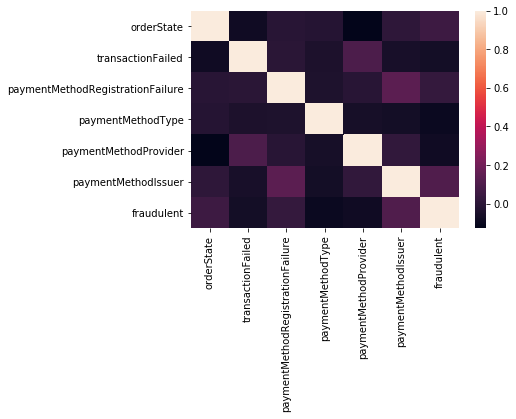

In [321]:
import seaborn as sns
%matplotlib inline
corr = dff1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [322]:
dff1.corr()

,orderState,transactionFailed,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,fraudulent
orderState,1.000000,-0.079843,-0.005753,-0.015895,-0.127173,0.010437,0.056502
transactionFailed,-0.079843,1.000000,-0.001202,-0.042436,0.100362,-0.052553,-0.068354
paymentMethodRegistrationFailure,-0.005753,-0.001202,1.000000,-0.035863,-0.008115,0.139921,0.030605
paymentMethodType,-0.015895,-0.042436,-0.035863,1.000000,-0.059081,-0.069347,-0.095241
paymentMethodProvider,-0.127173,0.100362,-0.008115,-0.059081,1.000000,0.020309,-0.081510
paymentMethodIssuer,0.010437,-0.052553,0.139921,-0.069347,0.020309,1.000000,0.107893
fraudulent,0.056502,-0.068354,0.030605,-0.095241,-0.081510,0.107893,1.000000


The model accuracy was 72.7%, it means 72.7% times model can predit the user profile is fraudulent or not 

According to correlation heatmap and correlation matrix, PaymentMethodIssuer, PaymentMethodProvider, PaymentMethodType pays a crusuial role to find weather the profile is fraudulent or not.